In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
!pip install deephaven

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.7/157.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.4/379.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00


In [ ]:
#Read the data
dataset = pd.read_csv("/content/Health index1 (1).csv")
dataset.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,19.0
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,19.0
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,19.0
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,6.0
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,6.0


In [ ]:
for col in dataset:
  print(dataset[col].unique())


[ 2845 12886  2820  1099  3210 13500 10200     3    16   488     4   254
 23349  9040 13200  6620  8710  5810   757   590  1310   122   106    95
    87    79  2183    76    14    40     5     7  2390 12880 10700   921
  9350  6200  3060  7907  5030   322   152   211   277   253   216   135
     0    38    36    30    52    24    21    59   104    35    28    25
    23     9     8     6     2    18    11    12   114  1450    81    67
  1230    54    44    37    22    20    19    10    17   178   478    13
    15   227    91    89    88    78    73    71    70    61    58    57
    56    51    50    49    48    47    46    42    39    34    33    32
    29    27    26]
[  5860     61  16400     70   3570    343  11900  15459   2470  11861
  26100  21800    592   2475   1870   1120   5250   4530    289  23200
   2690    294    581   1760    362    699    192    324  17600   2750
   2350   9400  12300   9050   1571  13100  22000    229    291    257
   3564   7140    669  21400 249900  21

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxigen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   Methane              470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   Ethylene             470 non-null    int64  
 7   Ethane               470 non-null    int64  
 8   Acethylene           470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power factor         470 non-null    float64
 11  Interfacial V        470 non-null    int64  
 12  Dielectric rigidity  470 non-null    int64  
 13  Water content        470 non-null    int64  
 14  Health index         470 non-null    float64
 15  Life expectation     470 non-null    flo

In [ ]:
data = dataset.drop(columns=['Life expectation'])

In [ ]:
data.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,404.261702,8357.372340,47759.561702,79.695745,244.000000,1816.414894,162.923404,81.940426,91.491489,17.036596,1.849043,38.434043,53.495745,16.282979,27.504043
std,2002.142678,14164.233283,13760.451816,489.320336,237.267485,2256.790519,1323.811504,342.573636,644.365828,46.735057,6.144009,6.178830,6.458906,17.115646,17.741458
min,0.000000,57.000000,3600.000000,0.000000,10.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.050000,21.000000,27.000000,0.000000,13.400000
25%,4.000000,496.000000,41700.000000,2.000000,66.000000,641.750000,0.000000,0.000000,0.000000,0.000000,0.570000,32.000000,51.000000,5.000000,13.400000
50%,9.000000,3810.000000,49100.000000,3.000000,150.500000,1125.000000,3.000000,4.000000,0.000000,0.000000,1.000000,39.000000,54.000000,12.000000,13.400000
75%,34.000000,14875.000000,55875.000000,7.000000,361.750000,2257.500000,6.000000,69.750000,0.000000,2.000000,1.000000,44.000000,56.000000,21.000000,38.550000
max,23349.000000,249900.000000,85300.000000,7406.000000,1730.000000,24900.000000,16684.000000,5467.000000,9740.000000,227.000000,73.200000,57.000000,75.000000,183.000000,95.200000


In [ ]:
data

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,15,227,52900,3,60,853,3,84,0,0.0,1.00,32,56,28,13.4
466,15,334,47100,3,64,622,3,108,0,0.0,1.00,32,55,12,13.4
467,15,1280,35000,2,675,2530,0,0,0,5.0,0.30,45,58,8,13.4
468,15,169,50600,5,77,532,0,72,0,0.0,1.21,33,54,11,13.4


In [ ]:
data.rename(columns = {'Oxigen':'Oxygen'}, inplace = True)

In [ ]:
data.describe()

,Hydrogen,Oxygen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,404.261702,8357.372340,47759.561702,79.695745,244.000000,1816.414894,162.923404,81.940426,91.491489,17.036596,1.849043,38.434043,53.495745,16.282979,27.504043
std,2002.142678,14164.233283,13760.451816,489.320336,237.267485,2256.790519,1323.811504,342.573636,644.365828,46.735057,6.144009,6.178830,6.458906,17.115646,17.741458
min,0.000000,57.000000,3600.000000,0.000000,10.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.050000,21.000000,27.000000,0.000000,13.400000
25%,4.000000,496.000000,41700.000000,2.000000,66.000000,641.750000,0.000000,0.000000,0.000000,0.000000,0.570000,32.000000,51.000000,5.000000,13.400000
50%,9.000000,3810.000000,49100.000000,3.000000,150.500000,1125.000000,3.000000,4.000000,0.000000,0.000000,1.000000,39.000000,54.000000,12.000000,13.400000
75%,34.000000,14875.000000,55875.000000,7.000000,361.750000,2257.500000,6.000000,69.750000,0.000000,2.000000,1.000000,44.000000,56.000000,21.000000,38.550000
max,23349.000000,249900.000000,85300.000000,7406.000000,1730.000000,24900.000000,16684.000000,5467.000000,9740.000000,227.000000,73.200000,57.000000,75.000000,183.000000,95.200000


In [ ]:
import seaborn as sns
!pip install stats
sns.distplot(data['Health index'],color='purple')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data['Health index']))) # for normal it should be close to zero.here it is 3.3...so data is more peaKed than normal
print( 'Skewness of normal distribution: {}'.format(stats.skew(data['Health index']))) # for normal skewness should be btwn -1 and 1 but here our data is highly skewed

In [ ]:
data.drop_duplicates()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,15,227,52900,3,60,853,3,84,0,0.0,1.00,32,56,28,13.4
466,15,334,47100,3,64,622,3,108,0,0.0,1.00,32,55,12,13.4
467,15,1280,35000,2,675,2530,0,0,0,5.0,0.30,45,58,8,13.4
468,15,169,50600,5,77,532,0,72,0,0.0,1.21,33,54,11,13.4


In [ ]:
#check for missing values
data.isna().sum()

Hydrogen               0
Oxigen                 0
Nitrogen               0
Methane                0
CO                     0
CO2                    0
Ethylene               0
Ethane                 0
Acethylene             0
DBDS                   0
Power factor           0
Interfacial V          0
Dielectric rigidity    0
Water content          0
Health index           0
dtype: int64

In [ ]:
corr = data.corr()

In [ ]:
corr


,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
Hydrogen,1.000000,-0.054989,-0.114050,0.634567,-0.029333,0.016366,0.442336,0.482226,0.354975,-0.048598,0.227482,0.101098,0.051834,-0.076245,0.377388
Oxigen,-0.054989,1.000000,0.092438,-0.035593,-0.047161,-0.047253,-0.010588,-0.073319,0.207559,-0.032990,-0.076762,0.219819,-0.123626,-0.141714,0.121009
Nitrogen,-0.114050,0.092438,1.000000,-0.101023,0.027335,0.134220,-0.066404,-0.058571,-0.011292,0.152747,0.087955,-0.078527,-0.191573,0.000076,0.089455
Methane,0.634567,-0.035593,-0.101023,1.000000,-0.007771,0.063087,0.801129,0.914559,0.230079,-0.023055,0.070275,0.112699,0.026885,-0.039642,0.361770
CO,-0.029333,-0.047161,0.027335,-0.007771,1.000000,0.555432,-0.025930,-0.099748,-0.014762,0.059271,0.103007,0.144189,-0.046546,-0.038400,0.112751
CO2,0.016366,-0.047253,0.134220,0.063087,0.555432,1.000000,0.036822,-0.006660,-0.011840,0.080156,0.309407,0.037421,-0.076638,0.076053,0.168777
Ethylene,0.442336,-0.010588,-0.066404,0.801129,-0.025930,0.036822,1.000000,0.755344,0.255074,-0.029814,0.014871,0.103618,0.022044,-0.006573,0.271504
Ethane,0.482226,-0.073319,-0.058571,0.914559,-0.099748,-0.006660,0.755344,1.000000,0.206291,-0.047526,0.041412,0.009142,0.025386,0.029699,0.236507
Acethylene,0.354975,0.207559,-0.011292,0.230079,-0.014762,-0.011840,0.255074,0.206291,1.000000,-0.050700,-0.019516,0.136413,-0.007921,-0.074175,0.240143
DBDS,-0.048598,-0.032990,0.152747,-0.023055,0.059271,0.080156,-0.029814,-0.047526,-0.050700,1.000000,-0.064931,0.183434,-0.064712,-0.207384,0.468809


In [ ]:
corr['Health index'].sort_values(ascending=True)
#negative correlation and positive correlation is seen


Water content         -0.281165
Dielectric rigidity   -0.104426
Nitrogen               0.089455
Power factor           0.092729
CO                     0.112751
Oxigen                 0.121009
CO2                    0.168777
Ethane                 0.236507
Acethylene             0.240143
Ethylene               0.271504
Methane                0.361770
Hydrogen               0.377388
Interfacial V          0.400216
DBDS                   0.468809
Health index           1.000000
Name: Health index, dtype: float64

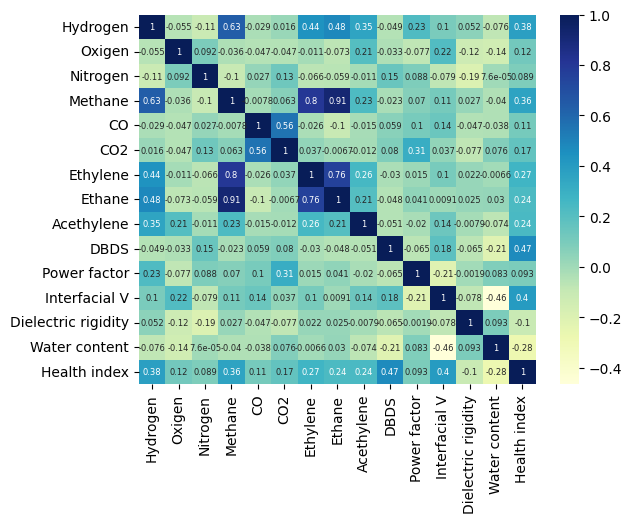

<Figure size 1000x800 with 0 Axes>

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True, annot_kws={'size': 6})

# displaying heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.show()

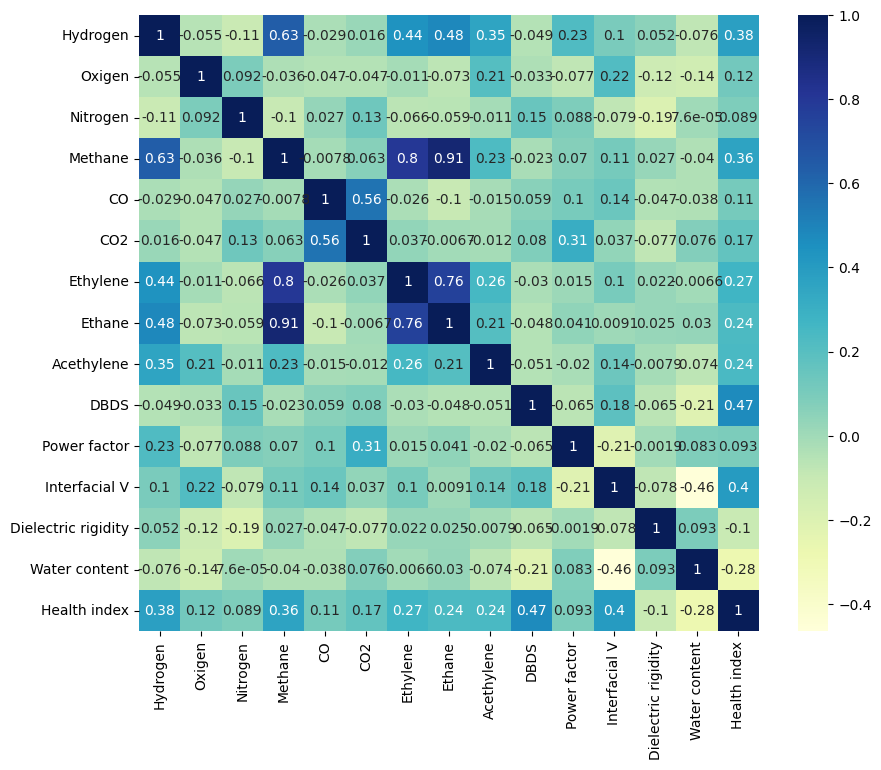

In [ ]:
corrmat=data.corr()
ind=corrmat.index
plt.figure(figsize=(10,8))
sns.heatmap(data[ind].corr(),annot=True,cmap="YlGnBu")
plt.show()

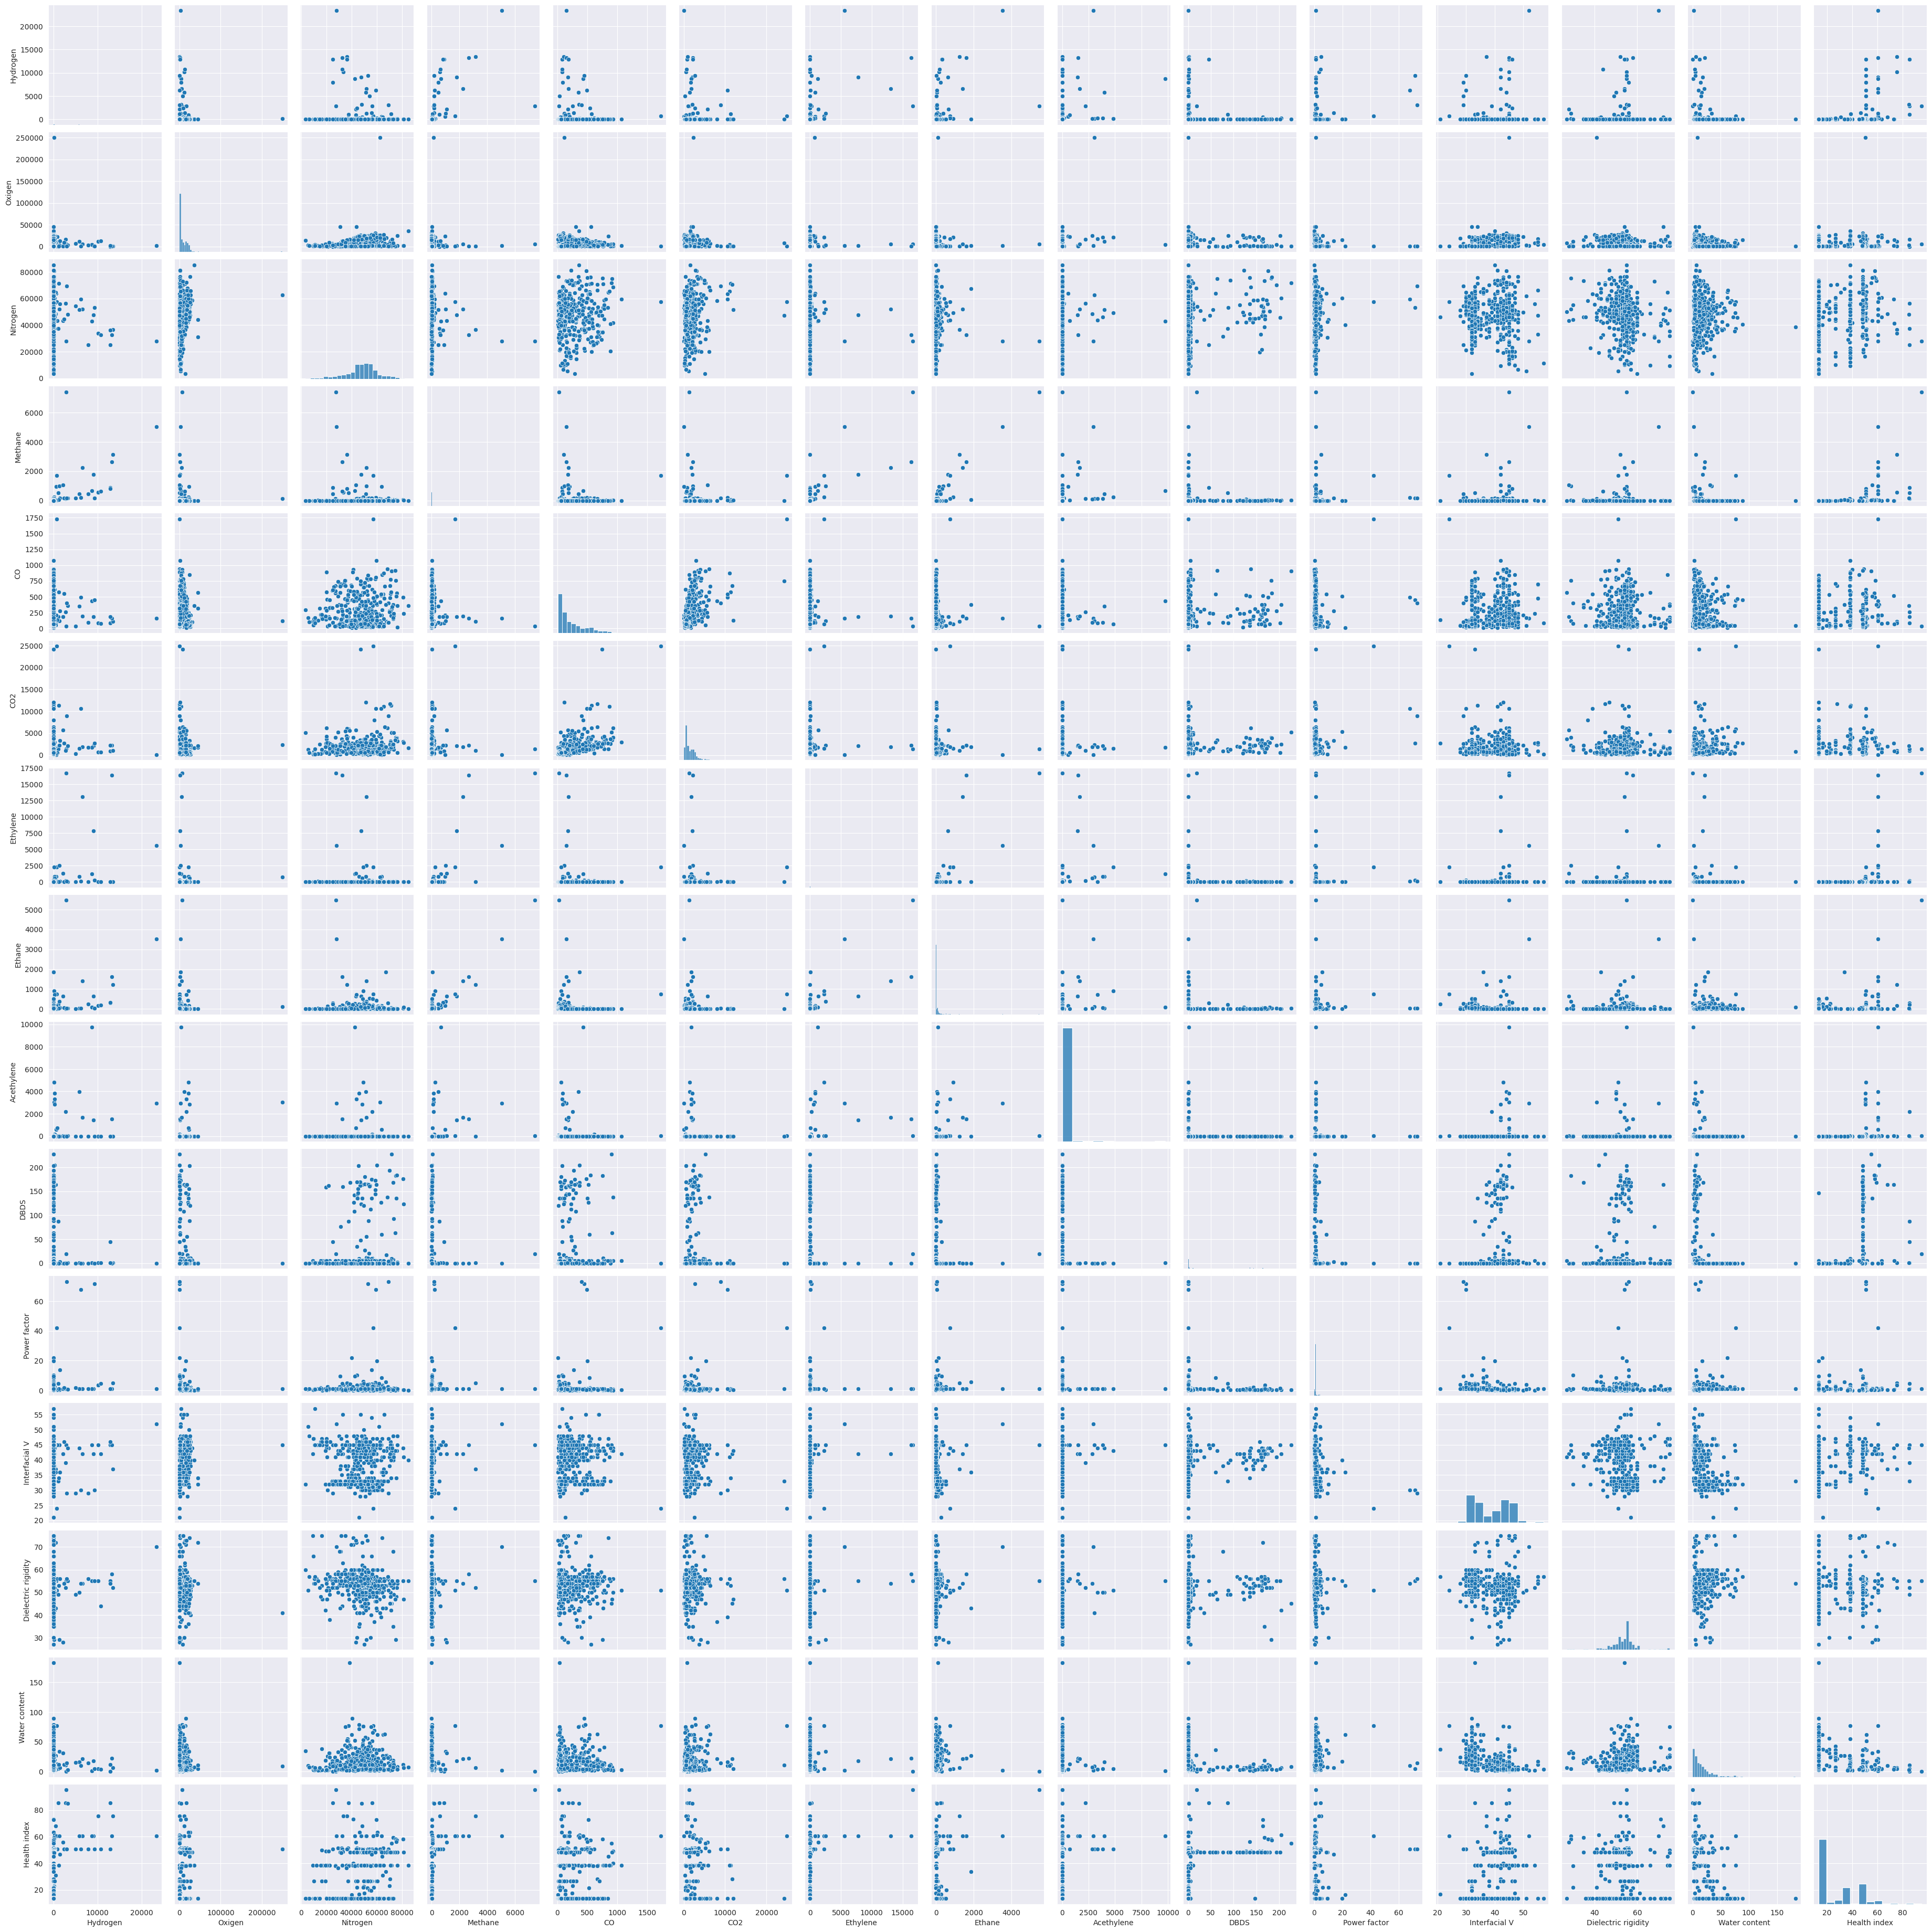

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [ ]:
Condition = []
for row in data['Health index']:
    if row > 85 and row <=100:
        Condition.append('Very Good')
    elif row > 70 and row <=85:
        Condition.append('Good')
    elif row > 50 and row <=70:
        Condition.append('Fair')
    elif row > 30 and row <=50:
        Condition.append('Poor')
    elif row >=0 and row <=30:
        Condition.append('Very Poor')
    else:
        Condition.append(np.NaN)

In [ ]:
data['Condition'] = Condition

In [ ]:
data.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Condition
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,Very Good
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,Very Good
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,Very Good
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,Very Good
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,Very Good


In [ ]:
data.drop(columns=['Health index'],axis=1,inplace=True)

In [ ]:
data

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Condition
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,Very Good
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,Very Good
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,Very Good
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,Very Good
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,15,227,52900,3,60,853,3,84,0,0.0,1.00,32,56,28,Very Poor
466,15,334,47100,3,64,622,3,108,0,0.0,1.00,32,55,12,Very Poor
467,15,1280,35000,2,675,2530,0,0,0,5.0,0.30,45,58,8,Very Poor
468,15,169,50600,5,77,532,0,72,0,0.0,1.21,33,54,11,Very Poor


In [ ]:
data.head(25)

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Condition
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,Very Good
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,Very Good
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,Very Good
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,Very Good
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,Very Good
5,13500,343,36500,3150,113,984,5,1230,1,1.0,4.93,37,52,6,Good
6,10200,11900,33700,573,87,611,0,162,0,1.0,3.53,45,55,5,Good
7,3,15459,41347,5,68,902,12,2,13,5.0,0.58,41,71,6,Good
8,16,2470,59600,8,520,2660,5,8,2,164.0,0.29,44,56,4,Good
9,488,11861,48353,13,85,1957,29,23,0,164.0,0.27,37,72,10,Fair


In [ ]:
# Encoding Concept
data['Condition'] = data['Condition'].astype('category')
data['Condition'] = data['Condition'].cat.codes

In [ ]:
data.head(25)

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Condition
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,3
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,3
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,3
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,3
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,3
5,13500,343,36500,3150,113,984,5,1230,1,1.0,4.93,37,52,6,1
6,10200,11900,33700,573,87,611,0,162,0,1.0,3.53,45,55,5,1
7,3,15459,41347,5,68,902,12,2,13,5.0,0.58,41,71,6,1
8,16,2470,59600,8,520,2660,5,8,2,164.0,0.29,44,56,4,1
9,488,11861,48353,13,85,1957,29,23,0,164.0,0.27,37,72,10,0


In [ ]:
data['Condition'].unique

<bound method Series.unique of 0      3
1      3
2      3
3      3
4      3
      ..
465    4
466    4
467    4
468    4
469    4
Name: Condition, Length: 470, dtype: int8>

In [ ]:
# Handling Imbalance data
data['Condition'].value_counts()

4    285
2    135
0     41
3      5
1      4
Name: Condition, dtype: int64

In [ ]:
pip install imblearn

In [ ]:
import imblearn

In [ ]:
# separating the independent and dependent variables
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
x

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,15,227,52900,3,60,853,3,84,0,0.0,1.00,32,56,28
466,15,334,47100,3,64,622,3,108,0,0.0,1.00,32,55,12
467,15,1280,35000,2,675,2530,0,0,0,5.0,0.30,45,58,8
468,15,169,50600,5,77,532,0,72,0,0.0,1.21,33,54,11


In [ ]:
y

0      3
1      3
2      3
3      3
4      3
      ..
465    4
466    4
467    4
468    4
469    4
Name: Condition, Length: 470, dtype: int8

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
x_over,y_over=over.fit_resample(x,y)

In [ ]:
x_over.shape

(1425, 14)

In [ ]:
y_over.shape

(1425,)

In [ ]:
y_over.value_counts()

3    285
1    285
0    285
2    285
4    285
Name: Condition, dtype: int64

In [ ]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,train_size=0.75,random_state=101)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1068, 14)
(357, 14)
(1068,)
(357,)


##KNN CLASSIFIER

In [ ]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
num_folds = 10
kfold = KFold(n_splits=10)

In [ ]:
modelknn = KNeighborsClassifier(n_neighbors=17)
resultsknn = cross_val_score(modelknn, x_train, y_train, cv=kfold)
modelknn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
print(resultsknn.mean())

0.7190971609945336


In [ ]:
y_pred_knn = modelknn.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy = accuracy_score(y_test, y_pred_knn)
#precision = precision_score(y_test, y_pred_knn)
#recall = recall_score(y_test, y_pred_knn)

print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)

NameError: ignored

In [ ]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
modelknn1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=modelknn1, param_grid=param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9110789346671933
{'n_neighbors': 1}


In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.69      0.59      0.64        79
           1       0.83      1.00      0.91        69
           2       0.62      0.51      0.56        79
           3       0.82      1.00      0.90        66
           4       0.65      0.62      0.63        64

    accuracy                           0.73       357
   macro avg       0.72      0.75      0.73       357
weighted avg       0.72      0.73      0.72       357



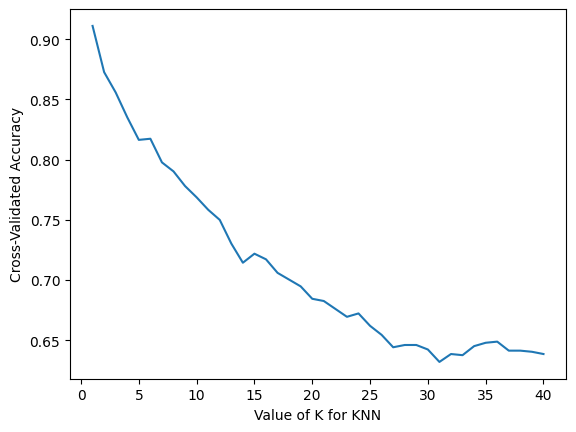

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
modelknn_1 = KNeighborsClassifier(n_neighbors=17)

modelknn_1.fit(x_train1, y_train1)

NameError: ignored

In [ ]:
y_pred_knn1 = modelknn_1.predict(x_test1)

In [ ]:
accuracy = accuracy_score(y_test1, y_pred_knn1)
#precision = precision_score(y_test, y_pred_knn)
#recall = recall_score(y_test, y_pred_knn)

print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)

Accuracy: 0.6440677966101694


##KNN WITHOUT BALANCING THE DATASET

In [ ]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split

x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,train_size=0.75,random_state=101)

print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(352, 14)
(118, 14)
(352,)
(118,)


In [ ]:
modelknn2 = KNeighborsClassifier(n_neighbors=17)
resultsknn2 = cross_val_score(modelknn2, x_train1, y_train1, cv=kfold)

In [ ]:
print(resultsknn2.mean())

0.611111111111111


In [ ]:
modelknn2 = KNeighborsClassifier()
grid2 = GridSearchCV(estimator=modelknn2, param_grid=param_grid)
grid2.fit(x_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
print(grid2.best_score_)
print(grid2.best_params_)

0.6420523138832998
{'n_neighbors': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

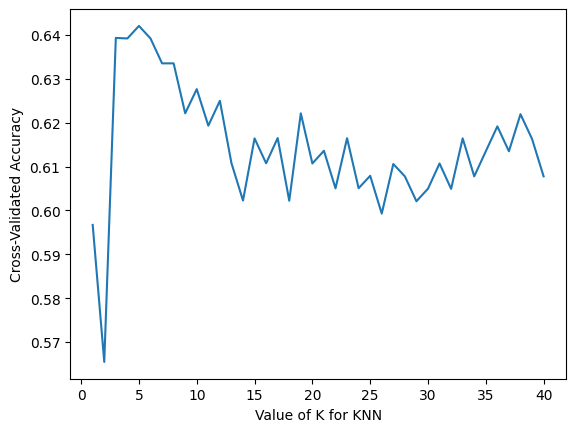

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train1, y_train1, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
modelknn2 = KNeighborsClassifier(n_neighbors=5)
resultsknn2 = cross_val_score(modelknn2, x_train1, y_train1, cv=kfold)
modelknn2.fit(x_train1, y_train1)

KNeighborsClassifier()

In [ ]:
y_pred_knn2 = modelknn2.predict(x_test1)

In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_knn2))

              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.00      0.00      0.00         1
           2       0.51      0.56      0.54        34
           3       0.00      0.00      0.00         2
           4       0.72      0.78      0.75        72

    accuracy                           0.65       118
   macro avg       0.38      0.31      0.32       118
weighted avg       0.64      0.65      0.64       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy score of training dataset:",accuracy_score(y_train1,y_pred_train_rf))
print("Accuracy score of test dataset:",accuracy_score(y_test1,y_pred_test_rf))

##RANDOM FOREST WITHOUT BALANCING THE DATA

In [ ]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split

x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,train_size=0.75,random_state=101)

print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(352, 14)
(118, 14)
(352,)
(118,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=32)
rf.fit(x_train1,y_train1)

RandomForestClassifier(random_state=32)

In [ ]:
y_pred_train_rf=rf.predict(x_train1)
y_pred_test_rf=rf.predict(x_test1)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score of training dataset:",accuracy_score(y_train1,y_pred_train_rf))
print("Accuracy score of test dataset:",accuracy_score(y_test1,y_pred_test_rf))

Accuracy score of training dataset: 1.0
Accuracy score of test dataset: 0.7711864406779662


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test1, y_pred_test_rf)

array([[ 5,  1,  1,  0,  2],
       [ 0,  0,  1,  0,  0],
       [ 2,  0, 21,  0, 11],
       [ 2,  0,  0,  0,  0],
       [ 0,  0,  7,  0, 65]])

In [ ]:
# View the classification report for test data and predictions
print(classification_report(y_test1, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.00      0.00      0.00         1
           2       0.70      0.62      0.66        34
           3       0.00      0.00      0.00         2
           4       0.83      0.90      0.87        72

    accuracy                           0.77       118
   macro avg       0.42      0.42      0.42       118
weighted avg       0.75      0.77      0.76       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##WITH BALANCING THE DATA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state=32)
rf1.fit(x_train,y_train)

RandomForestClassifier(random_state=32)

In [ ]:
y_pred_train_rf1=rf1.predict(x_train)
y_pred_test_rf1=rf1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score of training dataset:",accuracy_score(y_train,y_pred_train_rf1))
print("Accuracy score of test dataset:",accuracy_score(y_test,y_pred_test_rf1))

Accuracy score of training dataset: 1.0
Accuracy score of test dataset: 0.969187675070028


In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test_rf1)

array([[79,  0,  0,  0,  0],
       [ 0, 69,  0,  0,  0],
       [ 1,  0, 74,  0,  4],
       [ 0,  0,  0, 66,  0],
       [ 0,  0,  6,  0, 58]])

In [ ]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test_rf1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      1.00      1.00        69
           2       0.93      0.94      0.93        79
           3       1.00      1.00      1.00        66
           4       0.94      0.91      0.92        64

    accuracy                           0.97       357
   macro avg       0.97      0.97      0.97       357
weighted avg       0.97      0.97      0.97       357



##XGBoost without balancing the data

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_train_xgb=xgb.predict(x_train1)
y_pred_test_xgb=xgb.predict(x_test1)

In [ ]:
print("Accuracy score of training dataset:",accuracy_score(y_train1,y_pred_train_xgb))
print("Accuracy score of test dataset:",accuracy_score(y_test1,y_pred_test_xgb))

NameError: ignored

In [ ]:
# View confusion matrix for test data and predictions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test1, y_pred_test_xgb)

array([[ 5,  1,  1,  0,  2],
       [ 0,  0,  1,  0,  0],
       [ 3,  0, 24,  0,  7],
       [ 2,  0,  0,  0,  0],
       [ 1,  0,  6,  0, 65]])

In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.45      0.56      0.50         9
           1       0.00      0.00      0.00         1
           2       0.75      0.71      0.73        34
           3       0.00      0.00      0.00         2
           4       0.88      0.90      0.89        72

    accuracy                           0.80       118
   macro avg       0.42      0.43      0.42       118
weighted avg       0.79      0.80      0.79       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##with balancing the data

In [ ]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier()
xgb1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_train_xgb1=xgb1.predict(x_train)
y_pred_test_xgb1=xgb1.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_test_xgb1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        69
           2       0.94      0.85      0.89        79
           3       1.00      1.00      1.00        66
           4       0.83      0.94      0.88        64

    accuracy                           0.96       357
   macro avg       0.96      0.96      0.96       357
weighted avg       0.96      0.96      0.96       357



In [ ]:
confusion_matrix(y_test, y_pred_test_xgb1)

array([[79,  0,  0,  0,  0],
       [ 0, 69,  0,  0,  0],
       [ 0,  0, 67,  0, 12],
       [ 0,  0,  0, 66,  0],
       [ 0,  0,  4,  0, 60]])

In [ ]:
print("Accuracy score of training dataset:",accuracy_score(y_train,y_pred_train_xgb1))
print("Accuracy score of test dataset:",accuracy_score(y_test,y_pred_test_xgb1))

Accuracy score of training dataset: 1.0
Accuracy score of test dataset: 0.9635854341736695


##svm without balancing

In [ ]:
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'linear',random_state = 0)
classifier1.fit(x_train1,y_train1)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_train_svc=classifier1.predict(x_train1)
y_pred_test_svc=classifier1.predict(x_test1)

In [ ]:
confusion_matrix(y_test1, y_pred_test_svc)

array([[ 4,  2,  1,  0,  2],
       [ 0,  0,  1,  0,  0],
       [ 3,  1, 17,  0, 13],
       [ 2,  0,  0,  0,  0],
       [ 3,  0,  7,  0, 62]])

In [ ]:
print(classification_report(y_test1, y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.33      0.44      0.38         9
           1       0.00      0.00      0.00         1
           2       0.65      0.50      0.57        34
           3       0.00      0.00      0.00         2
           4       0.81      0.86      0.83        72

    accuracy                           0.70       118
   macro avg       0.36      0.36      0.36       118
weighted avg       0.71      0.70      0.70       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy score of training dataset:",accuracy_score(y_train1,y_pred_train_svc))
print("Accuracy score of test dataset:",accuracy_score(y_test1,y_pred_test_svc))

Accuracy score of training dataset: 0.7954545454545454
Accuracy score of test dataset: 0.7033898305084746


##with balancing

In [ ]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear',random_state = 0)
classifier2.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_train_svc2=classifier2.predict(x_train)
y_pred_test_svc2=classifier2.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred_test_svc2)

array([[54,  0,  7,  7, 11],
       [18, 15, 36,  0,  0],
       [ 7,  0, 56,  0, 16],
       [43,  0,  0, 23,  0],
       [ 0,  0, 12,  0, 52]])

In [ ]:
print(classification_report(y_test, y_pred_test_svc2))

              precision    recall  f1-score   support

           0       0.44      0.68      0.54        79
           1       1.00      0.22      0.36        69
           2       0.50      0.71      0.59        79
           3       0.77      0.35      0.48        66
           4       0.66      0.81      0.73        64

    accuracy                           0.56       357
   macro avg       0.67      0.55      0.54       357
weighted avg       0.66      0.56      0.54       357



In [ ]:
print("Accuracy score of training dataset:",accuracy_score(y_train,y_pred_train_svc2))
print("Accuracy score of test dataset:",accuracy_score(y_test,y_pred_test_svc2))

Accuracy score of training dataset: 0.5702247191011236
Accuracy score of test dataset: 0.5714285714285714


##feature scaling

In [ ]:
#FEATURE SCALING OF BALANCED DATA
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train) #x_train and x_test are the balanced data
X_test = sc_X.fit_transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf11 = RandomForestClassifier(random_state=32)
rf11.fit(X_train,y_train)

RandomForestClassifier(random_state=32)

In [ ]:
y_pred_train_rf11=rf11.predict(X_train)
y_pred_test_rf11=rf11.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score of training dataset:",accuracy_score(y_train,y_pred_train_rf11))
print("Accuracy score of test dataset:",accuracy_score(y_test,y_pred_test_rf11))

Accuracy score of training dataset: 1.0
Accuracy score of test dataset: 0.7535014005602241


##FEATURE SCALING OF IMBALANCED DATA

In [ ]:
#FEATURE SCALING OF IMBALANCED DATA
from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_train_IMB = sc_X1.fit_transform(x_train1) #x_train1 and x_test1 are the imbalanced data
X_test_IMB = sc_X1.fit_transform(x_test1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf22 = RandomForestClassifier(random_state=32)
rf22.fit(X_train_IMB,y_train1)   #x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,train_size=0.75,random_state=101)

RandomForestClassifier(random_state=32)

In [ ]:
y_pred_train_rf22=rf22.predict(X_train_IMB)
y_pred_test_rf22=rf22.predict(X_test_IMB)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score of training dataset:",accuracy_score(y_train1,y_pred_train_rf22))
print("Accuracy score of test dataset:",accuracy_score(y_test1,y_pred_test_rf22))

Accuracy score of training dataset: 1.0
Accuracy score of test dataset: 0.711864406779661


##KNN AFTER FEATURE SCALING OF BALANCED DATA

In [ ]:
modelknn_FS_BD = KNeighborsClassifier(n_neighbors=17)
resultsknn_FS_BD = cross_val_score(modelknn_FS_BD, X_train, y_train, cv=kfold)

In [ ]:
print(resultsknn_FS_BD.mean())

0.8051490037030506


##KNN AFTER FEATURE SCALING OF IMBALANCED DATA

In [ ]:
modelknn_FS_IMBD = KNeighborsClassifier(n_neighbors=17)
resultsknn_FS_IMBD = cross_val_score(modelknn_FS_IMBD, X_train_IMB, y_train1, cv=kfold)

In [ ]:
print(resultsknn_FS_IMBD.mean())

0.7470634920634921


##XG BOOST WITH FS OF BALANCED DATA

In [ ]:
from xgboost import XGBClassifier
xgb_FS_BD = XGBClassifier()
xgb_FS_BD.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_train_xgb_FS_BD=xgb_FS_BD.predict(X_train)
y_pred_test_xgb_FS_BD=xgb_FS_BD.predict(X_test)

In [ ]:
print("Accuracy score of training dataset:",accuracy_score(y_train,y_pred_train_xgb_FS_BD))
print("Accuracy score of test dataset:",accuracy_score(y_test,y_pred_test_xgb_FS_BD))

Accuracy score of training dataset: 1.0
Accuracy score of test dataset: 0.6078431372549019


##XG BOOST WITH FS OF IMBALANCED DATA

In [ ]:
##XG BOOST WITH FS OF IMBALANCED DATA
xgb_FS_IMBD = XGBClassifier()
xgb_FS_IMBD.fit(X_train_IMB,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_train_xgb_FS_IMBD=xgb_FS_IMBD.predict(X_train_IMB)
y_pred_test_xgb_FS_IMBD=xgb_FS_IMBD.predict(X_test_IMB)

In [ ]:
print("Accuracy score of training dataset:",accuracy_score(y_train1,y_pred_train_xgb_FS_IMBD))
print("Accuracy score of test dataset:",accuracy_score(y_test1,y_pred_test_xgb_FS_IMBD))

Accuracy score of training dataset: 1.0
Accuracy score of test dataset: 0.7288135593220338


##SVM WITH FS OF BALANCED DATA

In [ ]:
from sklearn.svm import SVC
classifier_FS_BD = SVC(kernel = 'linear',random_state = 0)
classifier_FS_BD.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_train_svc_FS_BD=classifier_FS_BD.predict(X_train)
y_pred_test_svc_FS_BD=classifier_FS_BD.predict(X_test)

In [ ]:
print("Accuracy score of training dataset:",accuracy_score(y_train,y_pred_train_svc_FS_BD))
print("Accuracy score of test dataset:",accuracy_score(y_test,y_pred_test_svc_FS_BD))

Accuracy score of training dataset: 0.8305243445692884
Accuracy score of test dataset: 0.8151260504201681


##SVM WITH FS OF IMBALANCED DATA

In [ ]:
from sklearn.svm import SVC
classifier_FS_IMBD = SVC(kernel = 'linear',random_state = 0)
classifier_FS_IMBD.fit(X_train_IMB,y_train1)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_train_svc_FS_IMBD=classifier_FS_IMBD.predict(X_train_IMB)
y_pred_test_svc_FS_IMBD=classifier_FS_IMBD.predict(X_test_IMB)

In [ ]:
print("Accuracy score of training dataset:",accuracy_score(y_train1,y_pred_train_svc_FS_IMBD))
print("Accuracy score of test dataset:",accuracy_score(y_test1,y_pred_test_svc_FS_IMBD))

Accuracy score of training dataset: 0.8039772727272727
Accuracy score of test dataset: 0.7372881355932204


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Normalizing the numerical data
from sklearn.preprocessing import scale
x_normal = scale(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_values = pca.fit_transform(x_normal)

In [ ]:
pca_values

array([[ 2.24992718e+01, -1.01890732e+00, -1.00166760e+00, ...,
        -1.47190936e+00, -2.79525488e+00, -8.23652516e-01],
       [ 3.90485316e+00,  6.74225128e-01, -7.56861754e-01, ...,
         1.74326364e+00,  3.48080303e-01,  3.29893075e-01],
       [ 1.17158947e+00,  1.03459024e+00, -3.20608899e-01, ...,
        -9.39698162e-02, -8.82606622e-03, -1.54719574e-01],
       ...,
       [-2.17495180e-01,  7.10063368e-01,  7.96059376e-01, ...,
        -6.35944596e-01, -1.11112938e-01,  7.46682985e-02],
       [-3.21409687e-01, -7.61728254e-01, -7.60076626e-01, ...,
         2.00456921e-01,  5.20812604e-02, -3.86792612e-02],
       [-3.24729399e-01, -1.33185220e+00, -1.06294964e+00, ...,
         2.64834432e-01,  1.19329780e-01, -1.02906886e-01]])

In [ ]:
# The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.22972849, 0.13053113, 0.12565791, 0.08705259, 0.08163094,
       0.06812121, 0.06124178, 0.05374612, 0.04740493, 0.03499099,
       0.0320076 , 0.02637876, 0.01781369, 0.00369387])

In [ ]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([22.97, 36.02, 48.59, 57.3 , 65.46, 72.27, 78.39, 83.76, 88.5 ,
       92.  , 95.2 , 97.84, 99.62, 99.99])

In [ ]:
pca.components_

array([[ 4.09859596e-01, -1.21502156e-02, -7.91381475e-02,
         5.31276909e-01, -2.56771690e-02,  1.87102743e-02,
         4.78046583e-01,  4.98245457e-01,  2.27905733e-01,
        -3.47287167e-02,  6.00673169e-02,  8.20358529e-02,
         2.97005388e-02, -3.45807492e-02],
       [-8.40584572e-03,  3.42019876e-01,  8.37738239e-02,
        -1.86152267e-02,  1.39632471e-01,  2.51136969e-02,
        -7.73562984e-03, -8.96813024e-02,  1.80090975e-01,
         3.06751729e-01, -2.32074715e-01,  5.78749361e-01,
        -2.24387898e-01, -5.30723900e-01],
       [ 4.10601384e-02, -1.06043809e-01,  2.21890435e-01,
         3.06551843e-02,  5.59474918e-01,  6.52636216e-01,
         4.03562301e-04, -2.69100798e-02, -5.82690549e-02,
         1.20292697e-01,  3.95554884e-01, -1.94085305e-02,
        -1.37035938e-01,  6.11417925e-02],
       [-8.17574051e-03,  4.03411032e-01,  5.88493166e-01,
        -1.60643138e-02, -2.80536087e-01, -7.59255754e-02,
         2.21712865e-02,  4.63252340e-02,  2.

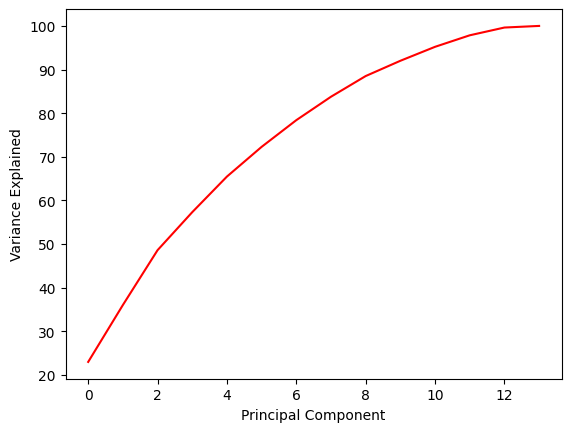

In [ ]:
# Variance plot for PCA components obtained
plt.plot(var1,color="red")
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

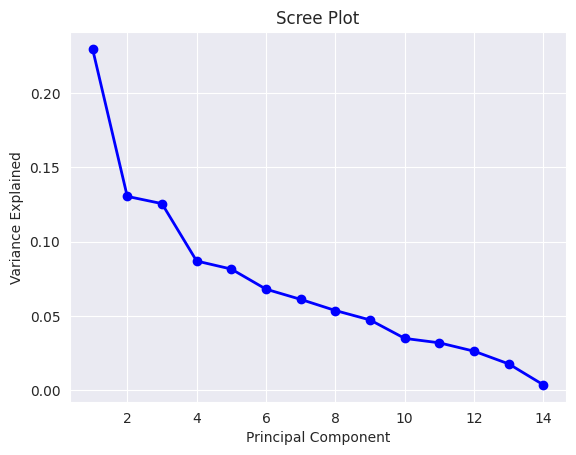

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

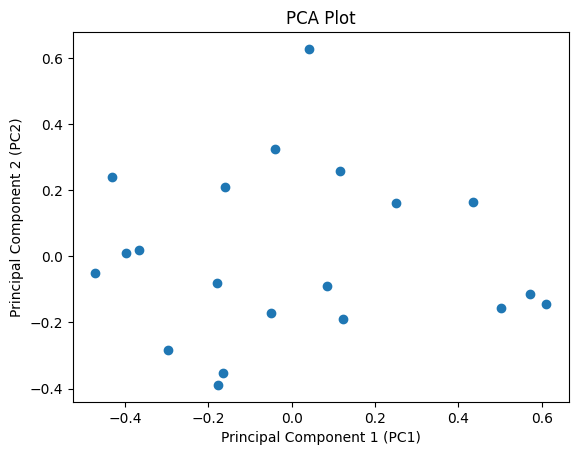

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Generate some example data
np.random.seed(42)
data = np.random.rand(20, 2)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Create a PCA plot
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA Plot")
plt.show()


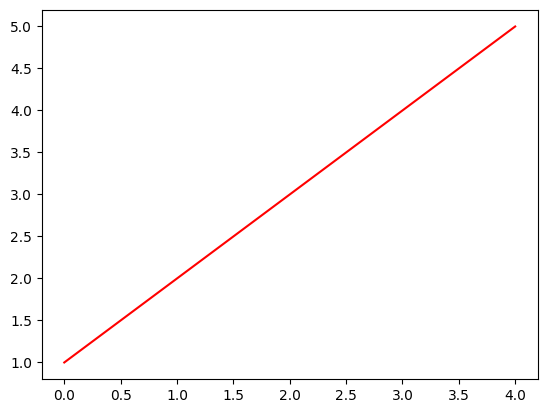

In [ ]:
import matplotlib.pyplot as plt

# Sample data
var1 = [1, 2, 3, 4, 5]

# Plotting with a red line
plt.plot(var1, color="red")

# Display the plot
plt.show()
